# Examen de certificación – Intento 4 - Alumno: Cristian Rivas

## Instrucciones para examen

### Objetivo
Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset real. Utilizaremos el «Wine Quality Dataset» disponible en [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo, así como una comprensión de las consideraciones éticas y tecnológicas en el análisis de datos.

---

### Contexto y Descripción del Dataset

El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

---

### Diccionario de Datos

1. **fixed acidity**: Acidez fija en g/dm³.
2. **volatile acidity**: Acidez volátil en g/dm³.
3. **citric acid**: Ácido cítrico en g/dm³.
4. **residual sugar**: Azúcar residual en g/dm³.
5. **chlorides**: Cloruros en g/dm³.
6. **free sulfur dioxide**: Dióxido de azufre libre en mg/dm³.
7. **total sulfur dioxide**: Dióxido de azufre total en mg/dm³.
8. **density**: Densidad en g/cm³.
9. **pH**: Nivel de pH.
10. **sulphates**: Sulfatos en g/dm³.
11. **alcohol**: Porcentaje de alcohol en % vol.
12. **quality**: Calidad del vino (variable objetivo, escala de 0 a 10).

---

### Requisitos

#### 1. Limpieza de Datos:
- **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

#### 2. Exploración de Datos:
- **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

#### 3. Implementación de Modelos:
- **Modelos de Clasificación:** Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).
- **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.
- **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

---


### Entrega

Los estudiantes deben entregar un archivo `.ipynb` comentado que incluya:

- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

---

### Consideraciones Éticas y Tecnológicas

#### **Consideraciones Éticas:**
- **Transparencia y Reproducibilidad:** Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- **Imparcialidad y Sesgo:** Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

#### **Consideraciones Tecnológicas:**
- **Herramientas Utilizadas:** Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- **Escalabilidad:** Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- **Optimización de Modelos:** Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

---


## 1. Limpieza de datos

### Importación de librerías y carga de datos

In [561]:
# Alumno: Cristian Rivas
# Las ideas y decisiones son propias. Aunque mejoré mi codigo usando ChatGPT

# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Cargando los datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')


### Identificación de valores faltantes y tipos de datos

In [562]:
# Mostrando las primeras filas de cada dataset para entender su estructura
print("Estructura del dataset de vino tinto:")
display(red_wine.head())

print("\nEstructura del dataset de vino blanco:")
display(white_wine.head())

# Mostrando información general para entender columnas, tipos de datos y valores faltantes
print("\nInformación del dataset de vino tinto:")
red_wine_info = pd.DataFrame({
    "Columna": red_wine.columns,
    "Tipo de Dato": red_wine.dtypes,
    "Valores No Nulos": red_wine.notnull().sum(),
    "Valores Nulos": red_wine.isnull().sum()
}).reset_index(drop=True)  # Resetea el índice y elimina el índice visual
display(red_wine_info)

print("\nInformación del dataset de vino blanco:")
white_wine_info = pd.DataFrame({
    "Columna": white_wine.columns,
    "Tipo de Dato": white_wine.dtypes,
    "Valores No Nulos": white_wine.notnull().sum(),
    "Valores Nulos": white_wine.isnull().sum()
}).reset_index(drop=True)  # Resetea el índice y elimina el índice visual
display(white_wine_info)

# Mostrando estadísticas descriptivas iniciales para ambas bases de datos
print("\nEstadísticas descriptivas del dataset de vino tinto:")
display(red_wine.describe())

print("\nEstadísticas descriptivas del dataset de vino blanco:")
display(white_wine.describe())


Estructura del dataset de vino tinto:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Estructura del dataset de vino blanco:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Información del dataset de vino tinto:


,Columna,Tipo de Dato,Valores No Nulos,Valores Nulos
0,fixed acidity,float64,1599,0
1,volatile acidity,float64,1599,0
2,citric acid,float64,1599,0
3,residual sugar,float64,1599,0
4,chlorides,float64,1599,0
5,free sulfur dioxide,float64,1599,0
6,total sulfur dioxide,float64,1599,0
7,density,float64,1599,0
8,pH,float64,1599,0
9,sulphates,float64,1599,0



Información del dataset de vino blanco:


,Columna,Tipo de Dato,Valores No Nulos,Valores Nulos
0,fixed acidity,float64,4898,0
1,volatile acidity,float64,4898,0
2,citric acid,float64,4898,0
3,residual sugar,float64,4898,0
4,chlorides,float64,4898,0
5,free sulfur dioxide,float64,4898,0
6,total sulfur dioxide,float64,4898,0
7,density,float64,4898,0
8,pH,float64,4898,0
9,sulphates,float64,4898,0



Estadísticas descriptivas del dataset de vino tinto:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Estadísticas descriptivas del dataset de vino blanco:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Identificación y eliminación de datos duplicados

In [563]:
# Identificar y eliminar duplicados en cada dataset
print(f"Duplicados en el dataset de vino tinto: {red_wine.duplicated().sum()}")
red_wine_cleaned = red_wine.drop_duplicates().copy()
print(f"Dataset de vino tinto después de eliminar duplicados: {red_wine_cleaned.shape}")

print(f"Duplicados en el dataset de vino blanco: {white_wine.duplicated().sum()}")
white_wine_cleaned = white_wine.drop_duplicates().copy()
print(f"Dataset de vino blanco después de eliminar duplicados: {white_wine_cleaned.shape}")


Duplicados en el dataset de vino tinto: 240
Dataset de vino tinto después de eliminar duplicados: (1359, 12)
Duplicados en el dataset de vino blanco: 937
Dataset de vino blanco después de eliminar duplicados: (3961, 12)


### Manejo de los datos

In [564]:
'''Por comodidad para el manejo de los datos y posible aplicación a un modelo(se detalla más adelante) he decidido inicialmente combinar ambos
datasets en uno solo, con la inclusión de una nueva columna "type "dedicada a hacer distinción entre ambos tipos de vino para que los datos no se
mezclen'''
# Crear una nueva columna 'type' en cada dataset
red_wine_cleaned['type'] = 'red'
white_wine_cleaned['type'] = 'white'

# Combinar ambos datasets en uno solo
combined_wine = pd.concat([red_wine_cleaned, white_wine_cleaned], ignore_index=True)

# Verificar la estructura del nuevo dataset combinado
print(f"Estructura del dataset combinado: {combined_wine.shape}")
display(combined_wine.head())  # Muestra las primeras filas de manera tabular

# Verificar los valores únicos en la columna 'type'
print("\nValores únicos en la columna 'type':")
unique_types = combined_wine['type'].value_counts()
display(unique_types)  # Muestra los valores únicos como una tabla clara

# Verificar los tipos de datos en el dataset combinado
print("\nTipos de datos en el dataset combinado:")
data_types = pd.DataFrame({
    "Columna": combined_wine.columns,
    "Tipo de Dato": combined_wine.dtypes
})
display(data_types)

'''Aparte de corroborar valores nulos, también se ha tenido en cuenta la posibilidad de existencia de valores no numéricos en cualquier
columna que se supone debería albergar exclusivamente datos numéricos, y se ha descartado esa posibilidad de la siguiente manera:'''

# Revisar si hay valores no numéricos en las columnas numéricas
num_columns = combined_wine.select_dtypes(include=['float64', 'int64']).columns
issues = []

for column in num_columns:
    if not combined_wine[column].apply(lambda x: isinstance(x, (int, float))).all():
        issues.append(column)

if issues:
    print(f"Se encontraron valores no numéricos en las siguientes columnas: {', '.join(issues)}")
else:
    print("Todas las columnas numéricas contienen únicamente valores numéricos.")



Estructura del dataset combinado: (5320, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red



Valores únicos en la columna 'type':


type
white    3961
red      1359
Name: count, dtype: int64


Tipos de datos en el dataset combinado:


,Columna,Tipo de Dato
fixed acidity,fixed acidity,float64
volatile acidity,volatile acidity,float64
citric acid,citric acid,float64
residual sugar,residual sugar,float64
chlorides,chlorides,float64
free sulfur dioxide,free sulfur dioxide,float64
total sulfur dioxide,total sulfur dioxide,float64
density,density,float64
pH,pH,float64
sulphates,sulphates,float64


Todas las columnas numéricas contienen únicamente valores numéricos.


## 2. Exploración de datos

#### Visualizaciones univariadas y multivariadas

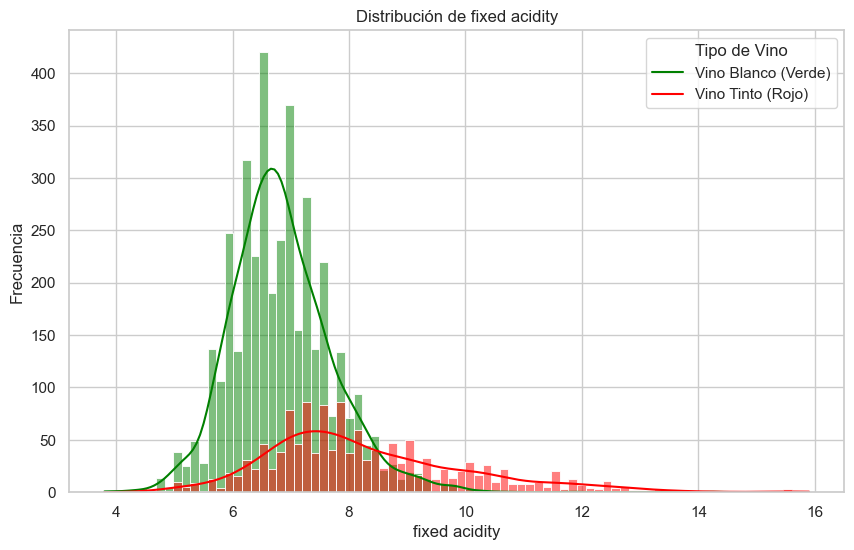

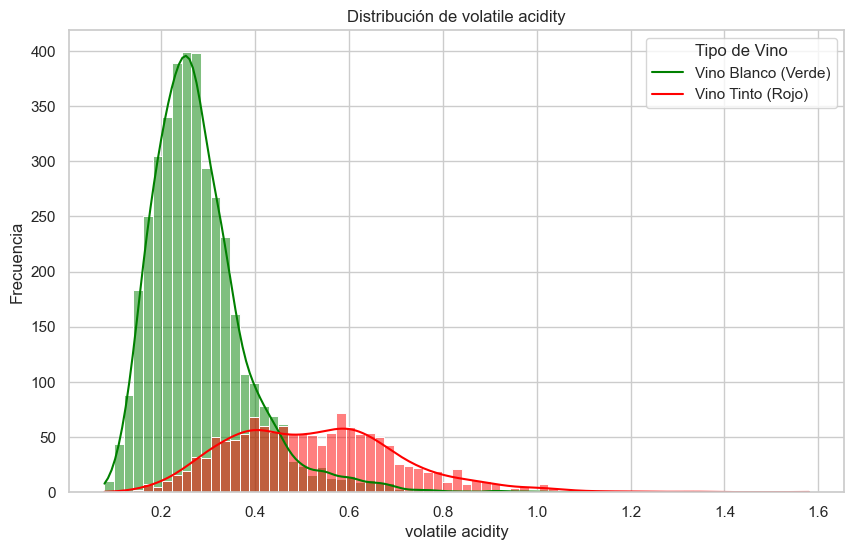

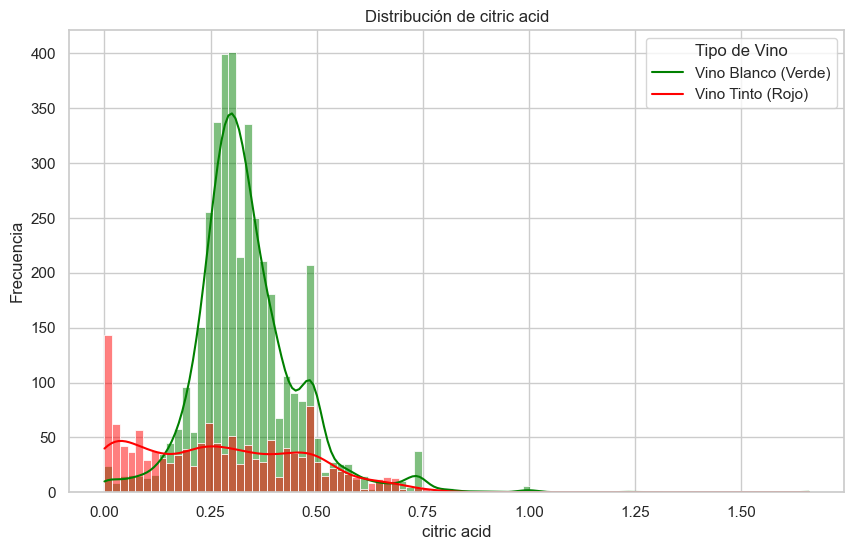

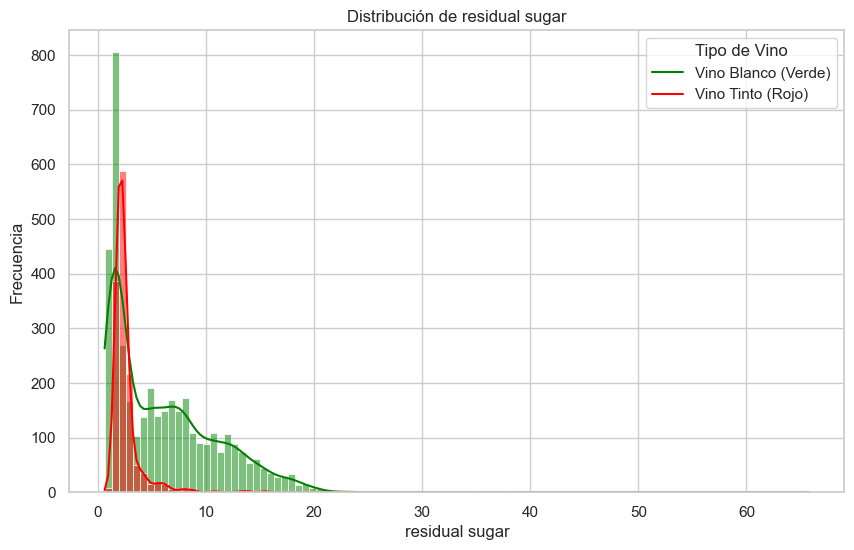

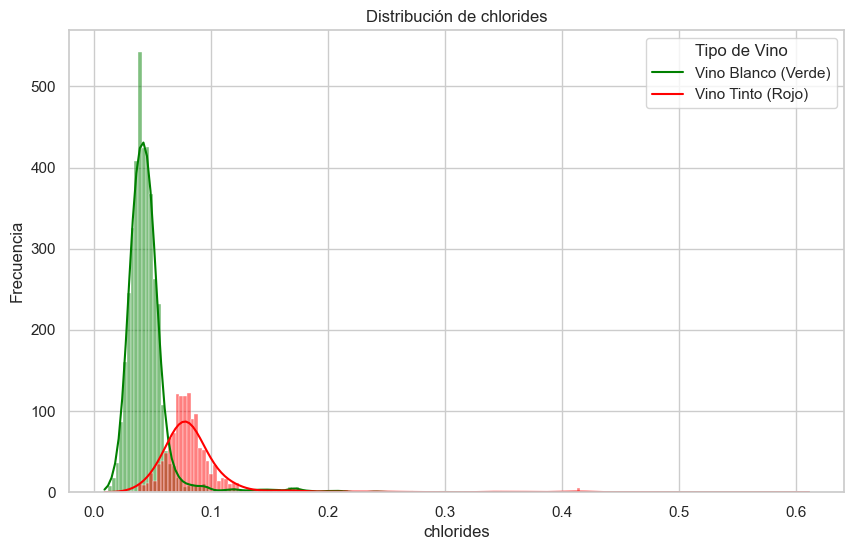

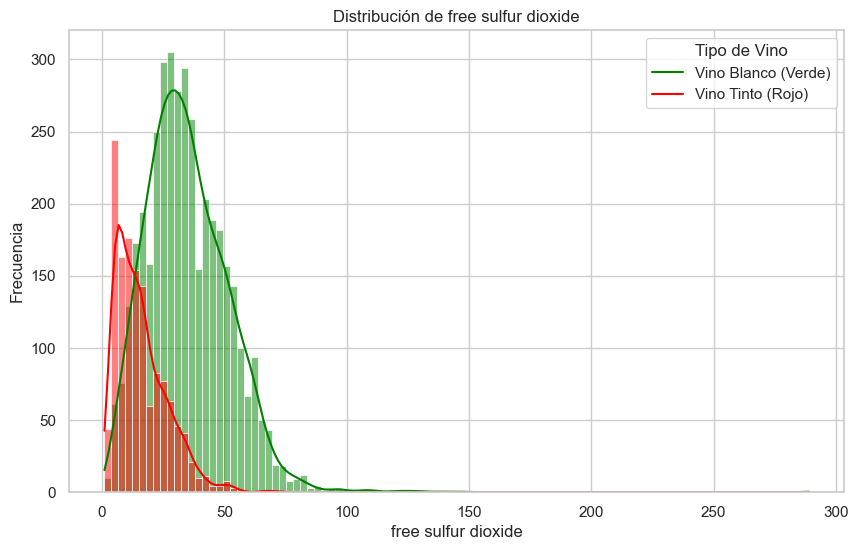

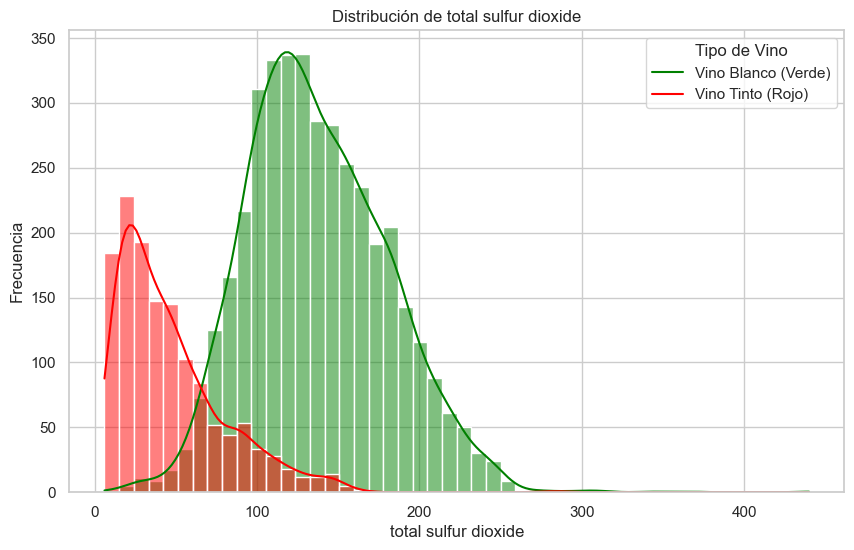

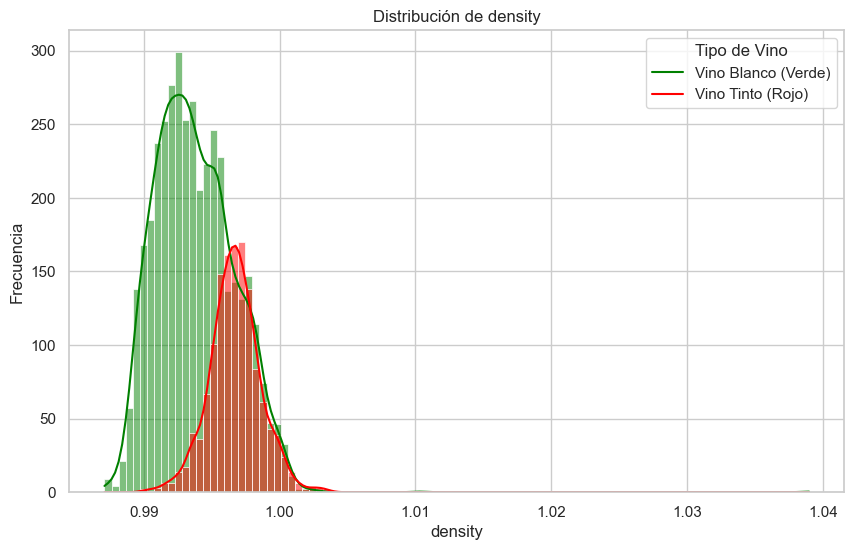

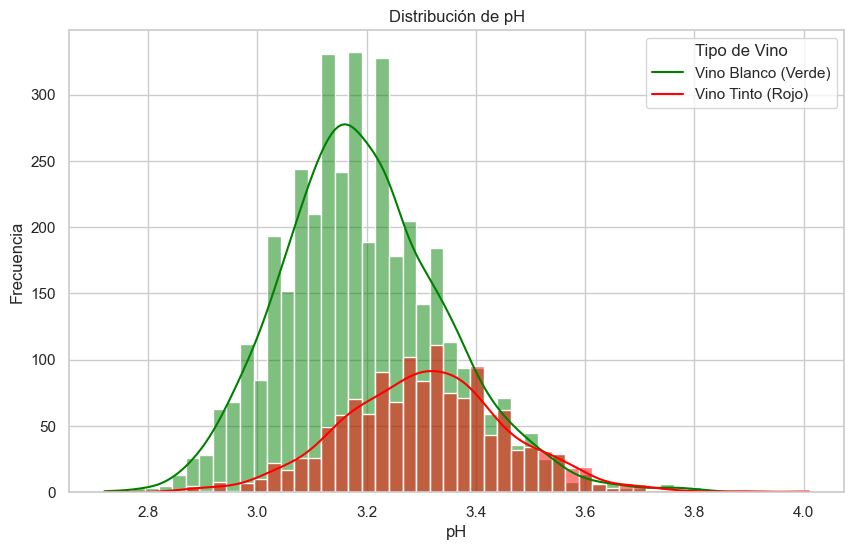

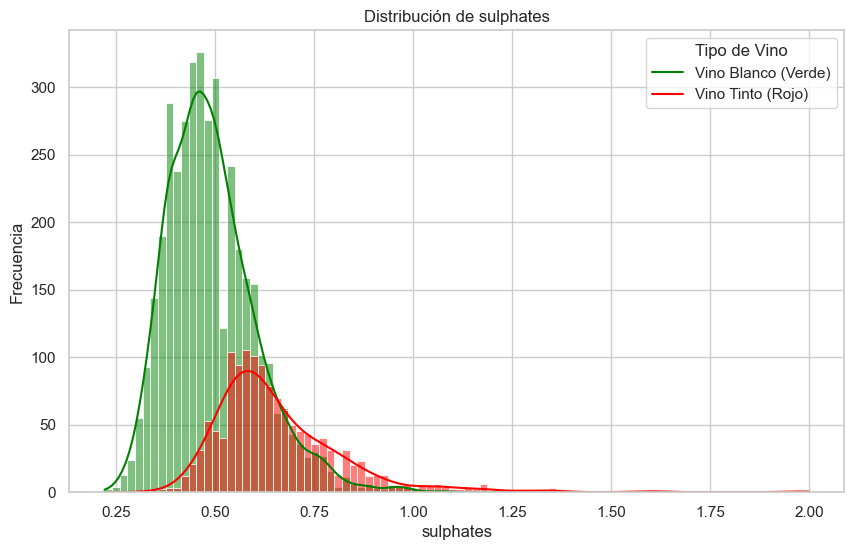

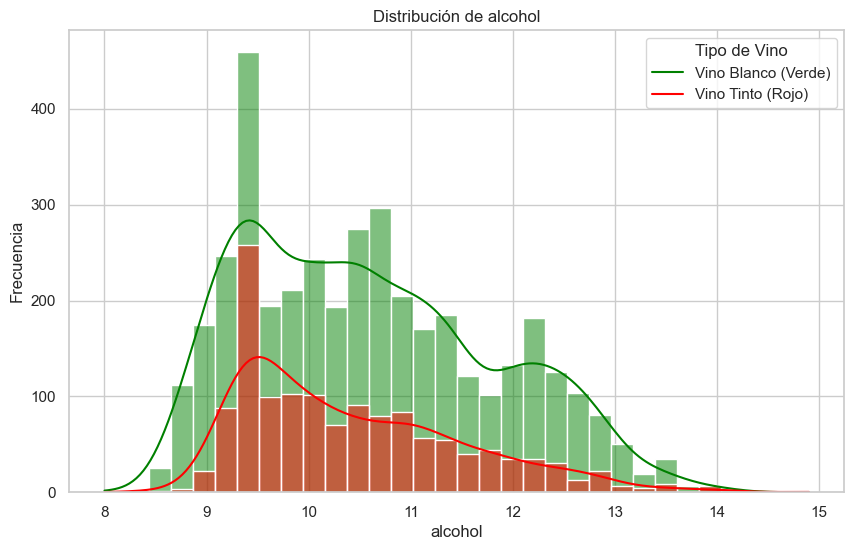

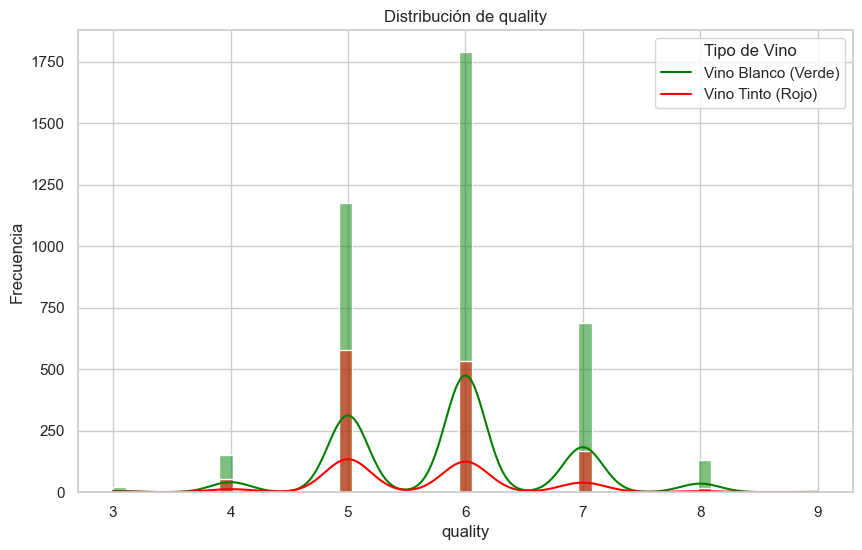

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


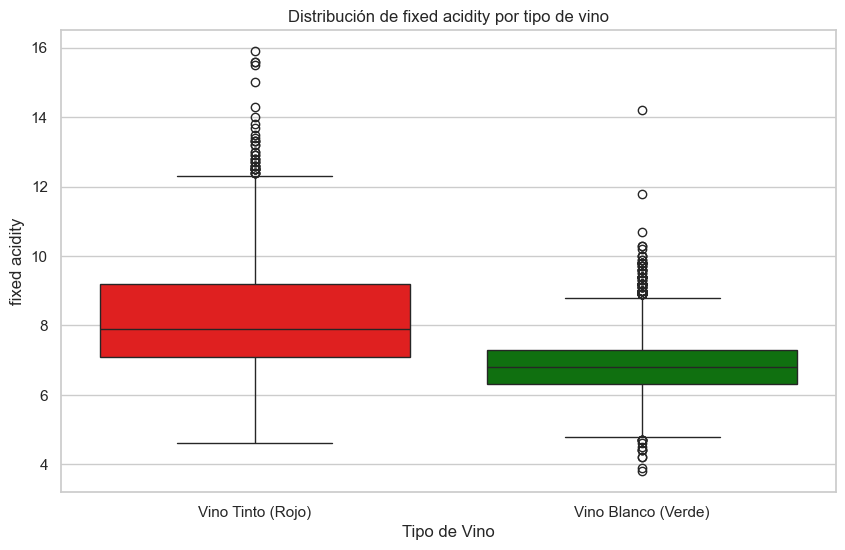

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


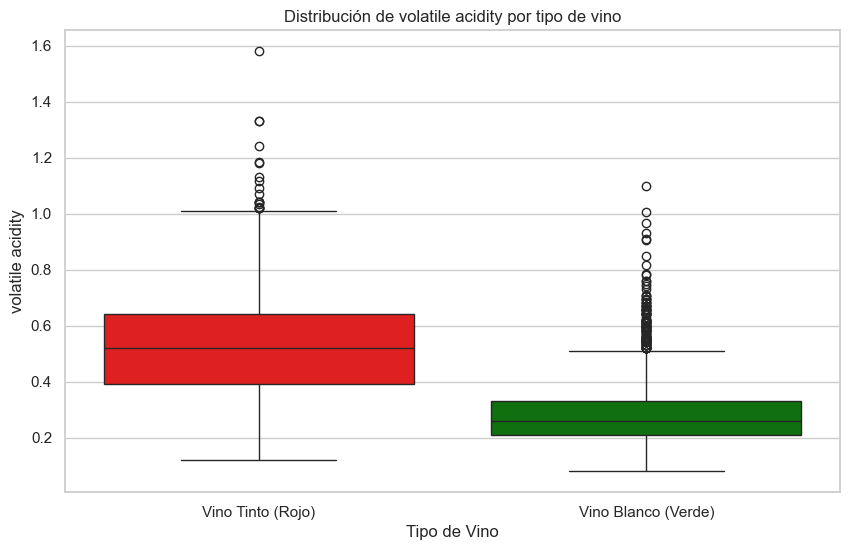

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


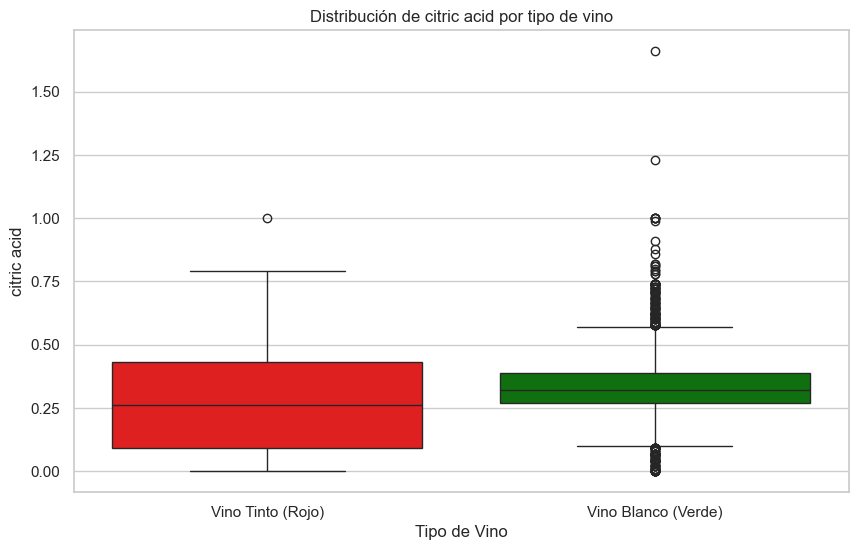

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


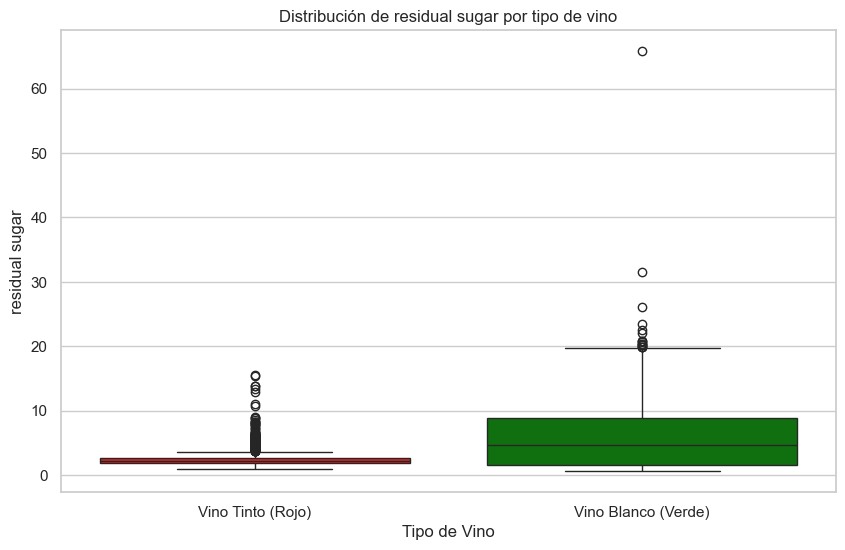

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


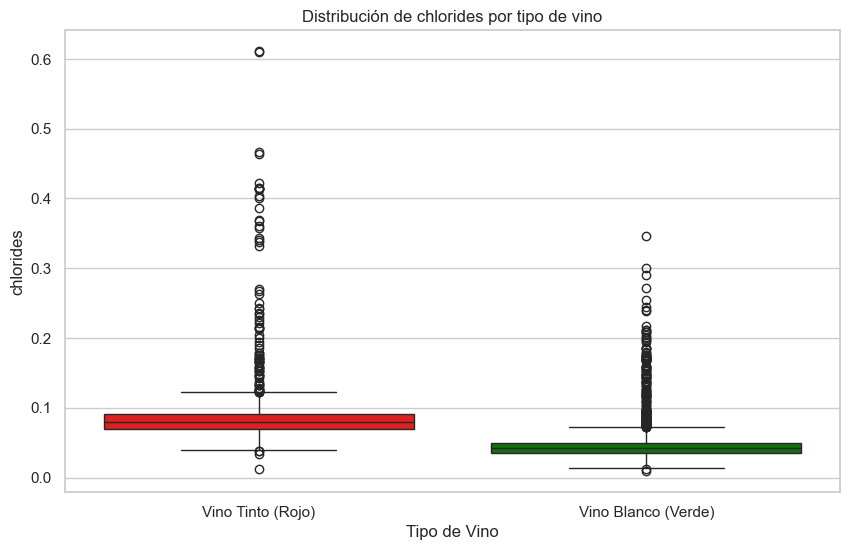

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


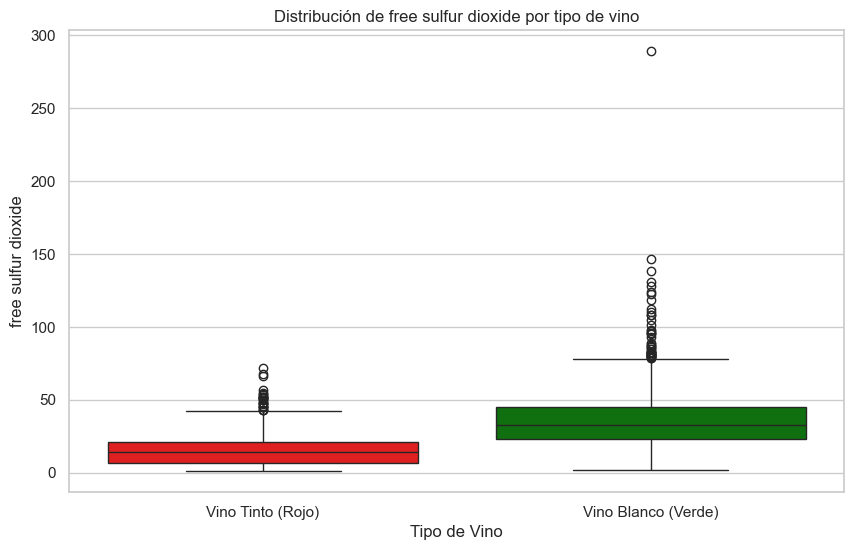

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


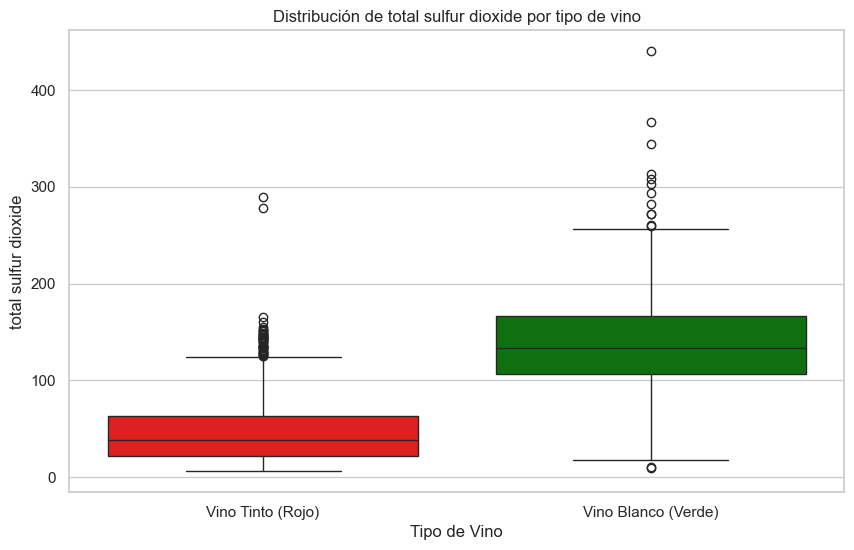

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


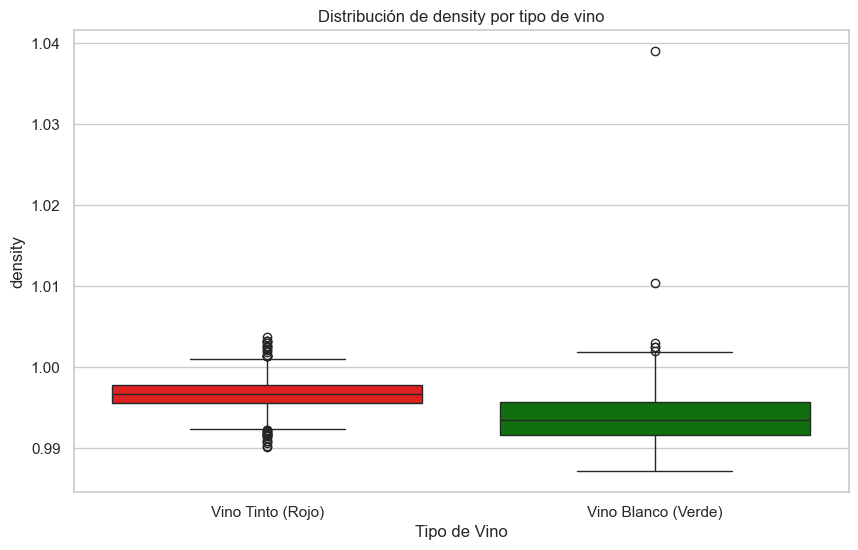

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


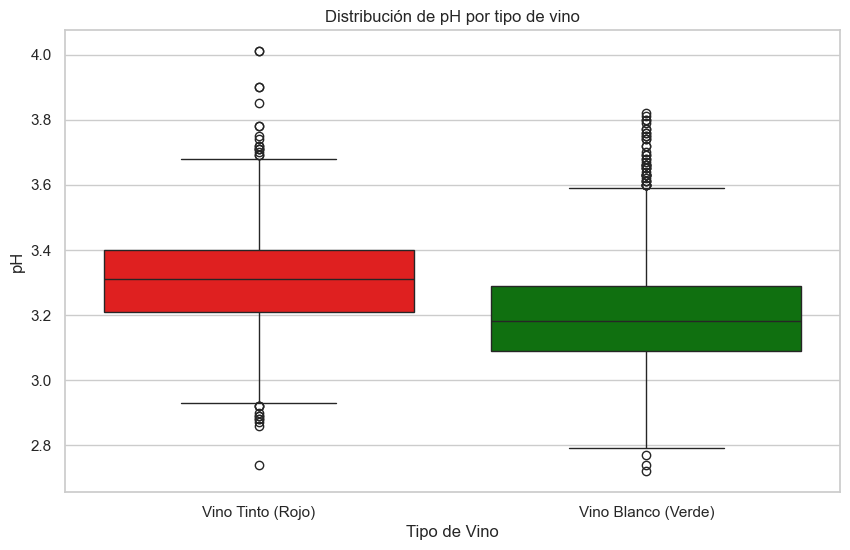

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


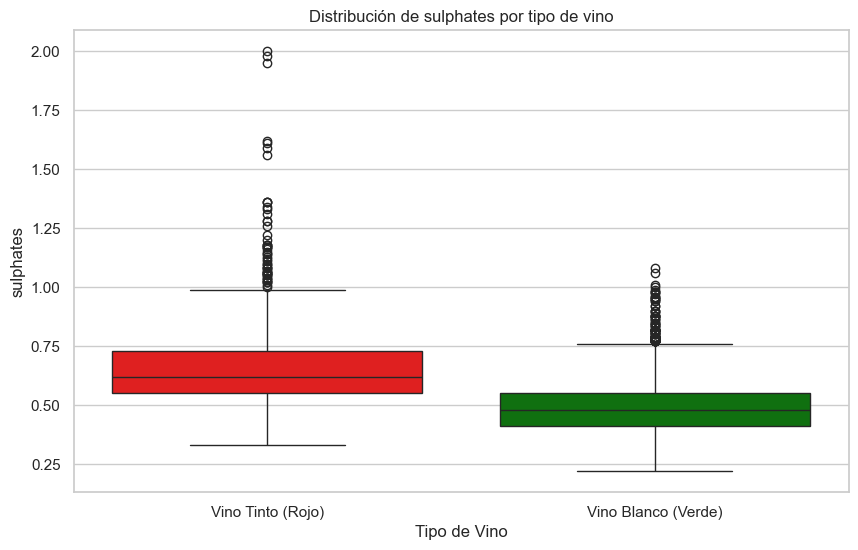

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


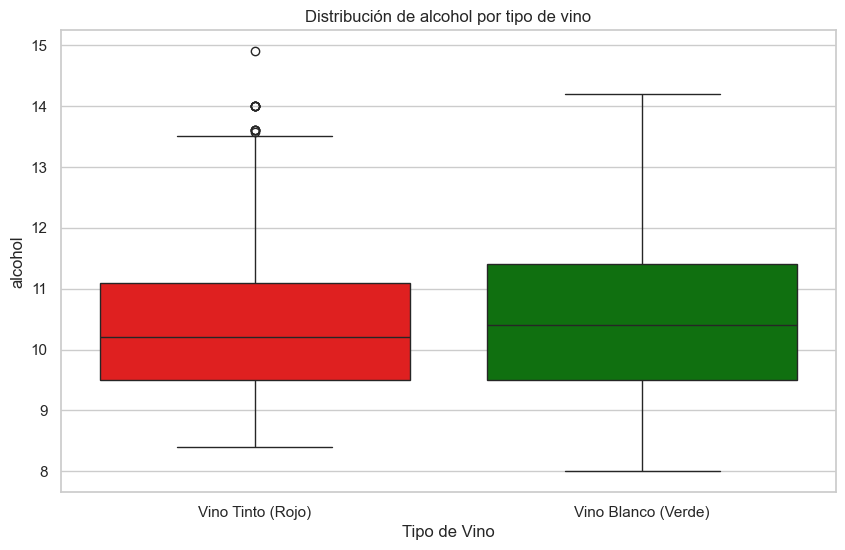

C:\Users\HP\AppData\Local\Temp\ipykernel_4512\537360873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


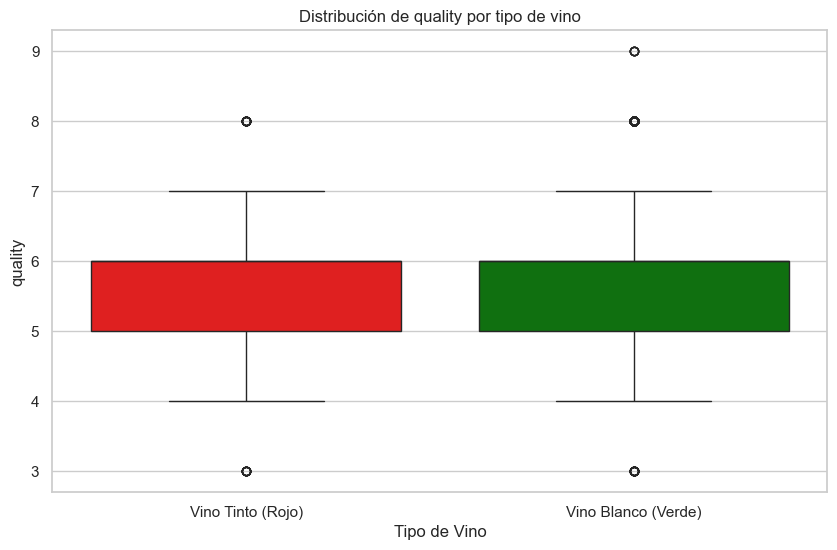

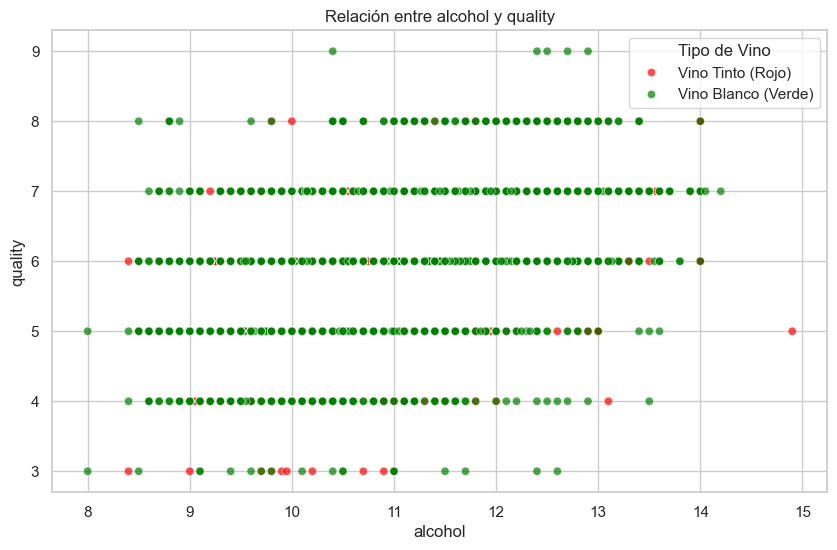

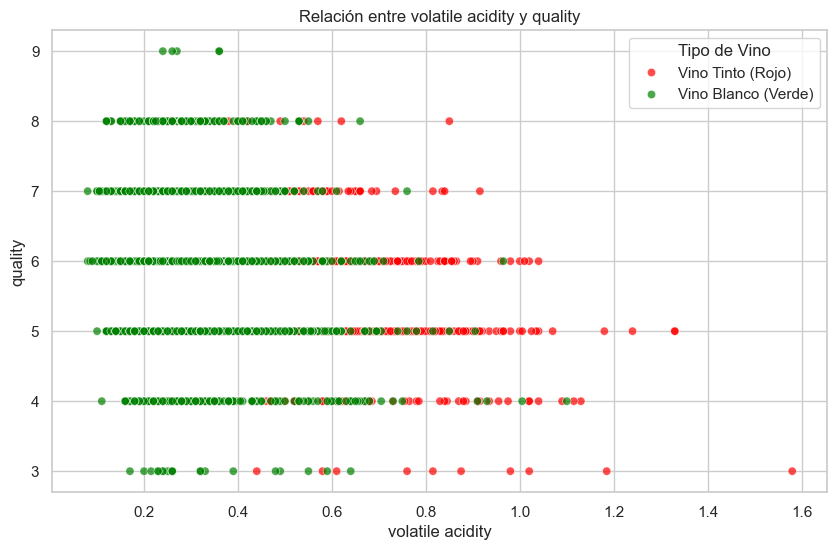

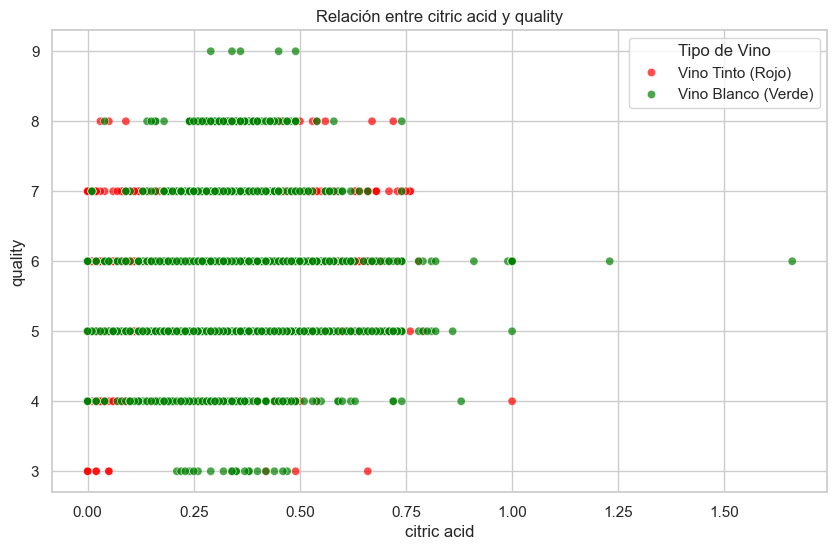

In [565]:
# Configuración de estilo
sns.set(style="whitegrid")

# Variables numéricas
num_columns = combined_wine.select_dtypes(include=['float64', 'int64']).columns

# 1. Histograma para cada variable numérica
for column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=combined_wine,
        x=column,
        kde=True,
        hue="type",
        palette={"red": "red", "white": "green"},  # Colores explícitos
        hue_order=["red", "white"]  # Orden correcto para vino tinto y blanco
    )
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.legend(
        title="Tipo de Vino",
        labels=["Vino Blanco (Verde)", "Vino Tinto (Rojo)"],
    )
    plt.show()

# 2. Boxplots para observar distribuciones y outliers
for column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=combined_wine,
        x="type",
        y=column,
        palette={"red": "red", "white": "green"},  # Colores explícitos
        order=["red", "white"]  # Orden correcto
    )
    plt.title(f"Distribución de {column} por tipo de vino")
    plt.xlabel("Tipo de Vino")
    plt.ylabel(column)
    plt.xticks([0, 1], ["Vino Tinto (Rojo)", "Vino Blanco (Verde)"])  # Ejes ajustados
    plt.show()

# 3. Scatterplots para relaciones entre pares de variables clave
pairs = [("alcohol", "quality"), ("volatile acidity", "quality"), ("citric acid", "quality")]

for x, y in pairs:
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=combined_wine,
        x=x,
        y=y,
        hue="type",
        palette={"red": "red", "white": "green"},  # Colores explícitos
        hue_order=["red", "white"],  # Orden correcto
        alpha=0.7
    )
    # Configurar leyenda personalizada
    handles, labels = scatter.get_legend_handles_labels()  # Obtener elementos de la leyenda
    plt.legend(
        handles=handles,
        labels=["Vino Tinto (Rojo)", "Vino Blanco (Verde)"],  # Etiquetas corregidas
        title="Tipo de Vino"
    )
    plt.title(f"Relación entre {x} y {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


#### Mapas de calor

##### Vino tinto

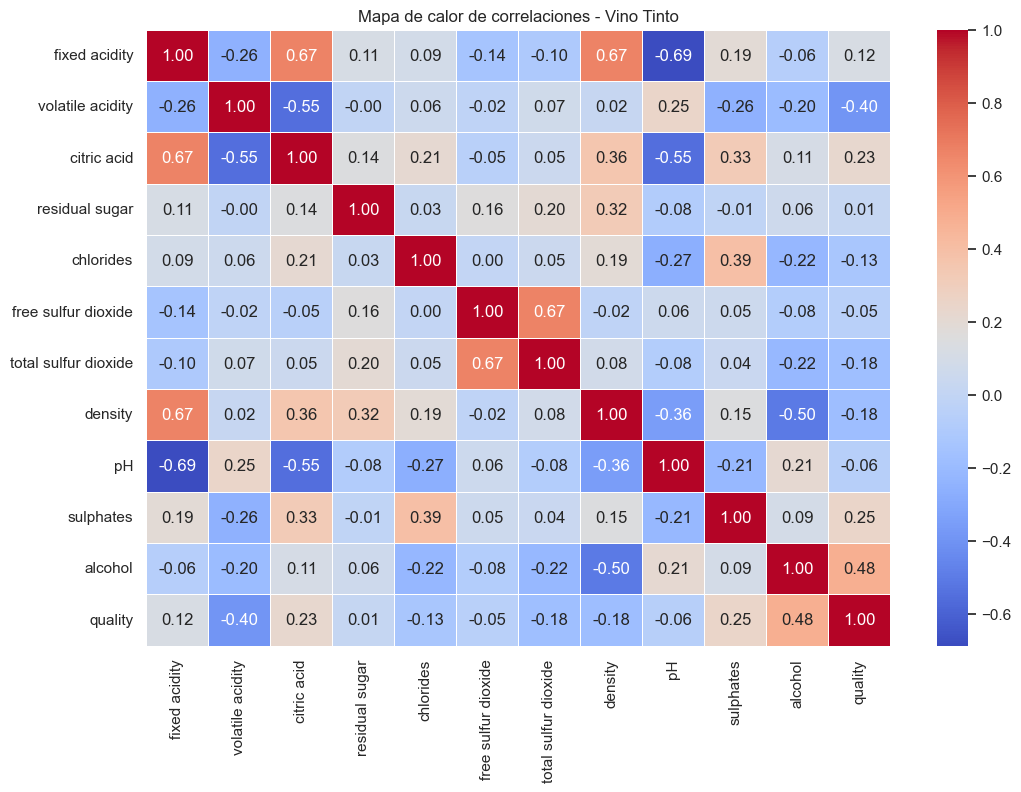

In [566]:
# 4. Heatmaps para visualizar correlaciones por tipo de vino
# Heatmap para el vino tinto
red_corr = combined_wine[combined_wine['type'] == 'red'][num_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    red_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Mapa de calor de correlaciones - Vino Tinto")
plt.show()


##### Vino blanco

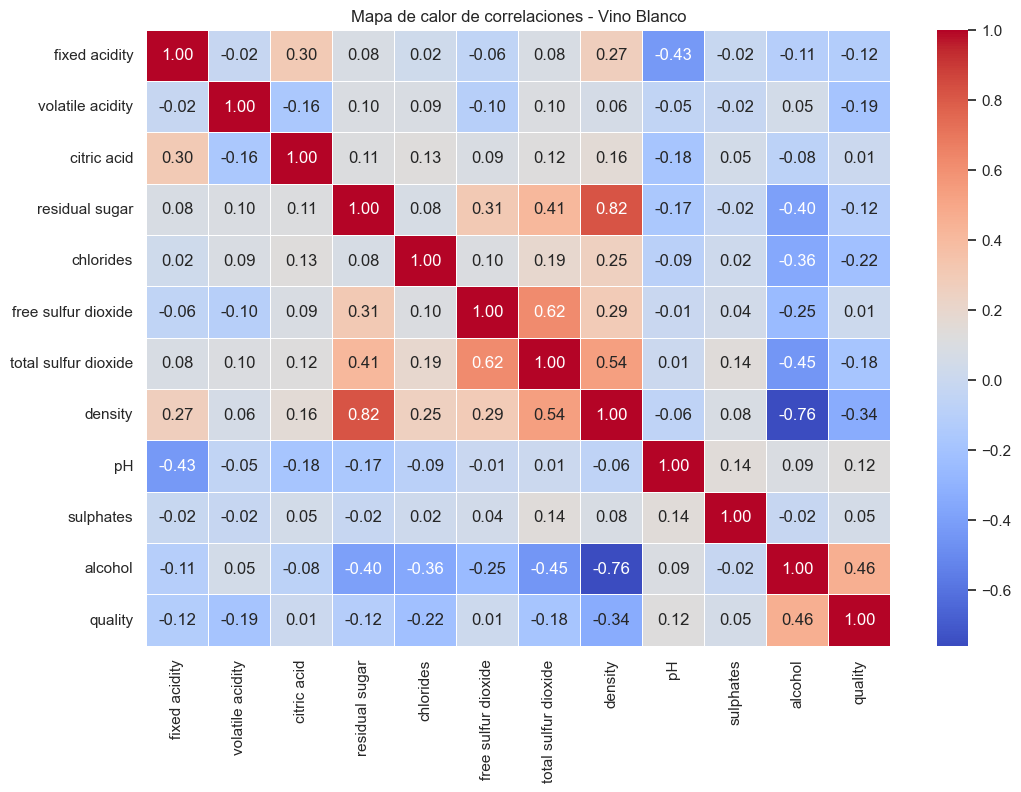

In [567]:
# Heatmap para el vino blanco
white_corr = combined_wine[combined_wine['type'] == 'white'][num_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    white_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Mapa de calor de correlaciones - Vino Blanco")
plt.show()


##### Dataset combinado

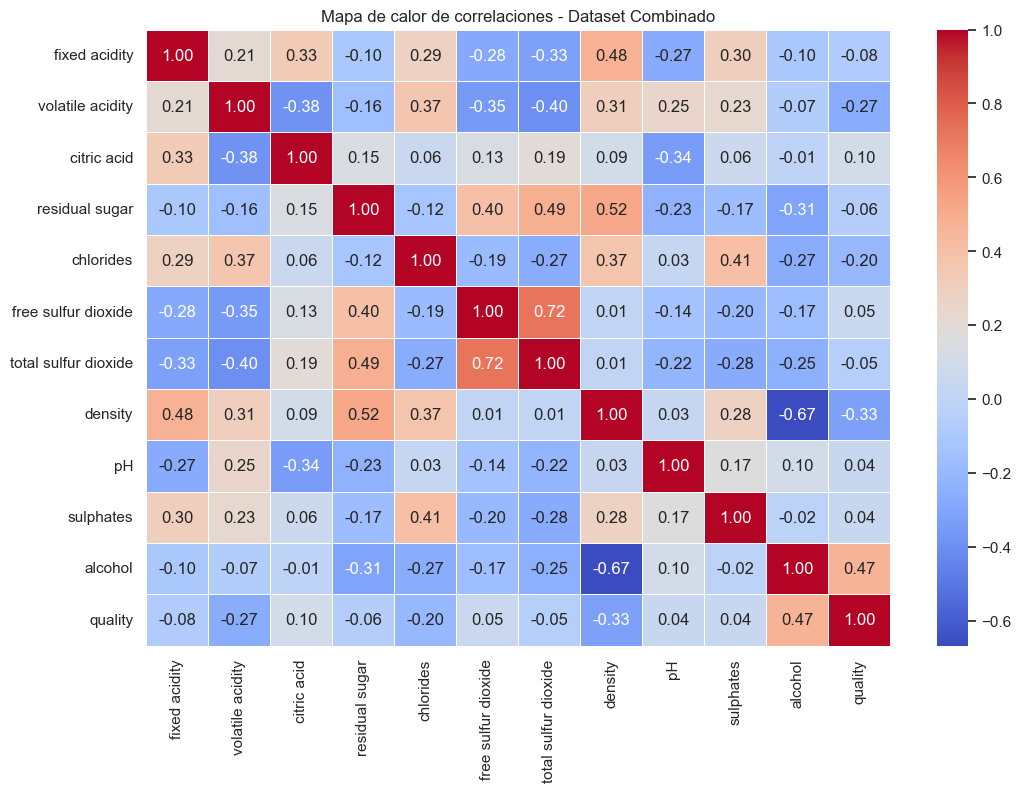

In [568]:
# Heatmap para el dataset combinado
combined_corr = combined_wine[num_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    combined_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Mapa de calor de correlaciones - Dataset Combinado")
plt.show()

#### Observaciones
He corroborado que los outliers en este dataset no son datos erróneos, pues, por ejemplo, un porcentaje de alcohol de 14% es factible, así como vinos clasificados con una calidad de 9, entre otros. Por lo tanto, he optado por no eliminar los outliers.

Además, he observado que las variables no se relacionan entre sí de la misma manera para vinos tintos y blancos. Por lo tanto, infiero que entrenar modelos separados para los diferentes tipos de vino podría arrojar predicciones más precisas dentro de cada grupo. Sin embargo, voy a comenzar entrenando modelos utilizando el dataset combinado (considerando la nueva columna "type" que le agregué) para evaluar qué tan buenas o malas son las predicciones. Posteriormente, probaré entrenar modelos con los datos de vino tinto y blanco por separado, con el objetivo de cuantificar la diferencia en la precisión de las predicciones entre modelos entrenados con el dataset combinado (manteniendo la distinción entre los tipos de vino) y modelos entrenados con ambos datasets por separado.

### Estadísticas descriptivas

In [569]:

# Filtrar los datasets para cada tipo de vino
red_wine = combined_wine[combined_wine["type"] == "red"]
white_wine = combined_wine[combined_wine["type"] == "white"]

# Función para calcular estadísticas descriptivas
def calculate_statistics(data, wine_type):
    num_columns = data.select_dtypes(include=['float64', 'int64']).columns
    stats_summary = pd.DataFrame(columns=["Media", "Mediana", "Moda", "Rango", "Desviación Estándar"])
    
    for column in num_columns:
        media = data[column].mean()
        mediana = data[column].median()
        moda = data[column].mode().iloc[0]  # En caso de múltiples modas, se toma la primera
        rango = data[column].max() - data[column].min()
        desviacion_std = data[column].std()
        
        # Agregar las estadísticas calculadas al DataFrame
        stats_summary.loc[column] = [media, mediana, moda, rango, desviacion_std]
    
    # Mostrar el resumen estadístico como una tabla clara
    display(stats_summary.style.set_caption(f"Resumen Estadístico - Vino {wine_type}").set_table_styles(
        [{'selector': 'caption', 'props': 'font-size:16px; text-align:left'}]
    ))
    
    return stats_summary

# Calcular estadísticas para vinos tintos y blancos
red_wine_stats = calculate_statistics(red_wine, "Tinto")
white_wine_stats = calculate_statistics(white_wine, "Blanco")
combined_wine_stats= calculate_statistics(combined_wine, "Datasets combinados")



,Media,Mediana,Moda,Rango,Desviación Estándar
fixed acidity,8.310596,7.900000,7.200000,11.300000,1.736990
volatile acidity,0.529478,0.520000,0.500000,1.460000,0.183031
citric acid,0.272333,0.260000,0.000000,1.000000,0.195537
residual sugar,2.523400,2.200000,2.000000,14.600000,1.352314
chlorides,0.088124,0.079000,0.080000,0.599000,0.049377
free sulfur dioxide,15.893304,14.000000,6.000000,71.000000,10.447270
total sulfur dioxide,46.825975,38.000000,28.000000,283.000000,33.408946
density,0.996709,0.996700,0.996800,0.013620,0.001869
pH,3.309787,3.310000,3.300000,1.270000,0.155036
sulphates,0.658705,0.620000,0.540000,1.670000,0.170667


,Media,Mediana,Moda,Rango,Desviación Estándar
fixed acidity,6.839346,6.800000,6.800000,10.400000,0.866860
volatile acidity,0.280538,0.260000,0.280000,1.020000,0.103437
citric acid,0.334332,0.320000,0.300000,1.660000,0.122446
residual sugar,5.914819,4.700000,1.200000,65.200000,4.861646
chlorides,0.045905,0.042000,0.036000,0.337000,0.023103
free sulfur dioxide,34.889169,33.000000,29.000000,287.000000,17.210021
total sulfur dioxide,137.193512,133.000000,111.000000,431.000000,43.129065
density,0.993790,0.993500,0.992000,0.051870,0.002905
pH,3.195458,3.180000,3.160000,1.100000,0.151546
sulphates,0.490351,0.480000,0.500000,0.860000,0.113523


,Media,Mediana,Moda,Rango,Desviación Estándar
fixed acidity,7.215179,7.000000,6.800000,12.100000,1.319671
volatile acidity,0.344130,0.300000,0.280000,1.500000,0.168248
citric acid,0.318494,0.310000,0.300000,1.660000,0.147157
residual sugar,5.048477,2.700000,1.600000,65.200000,4.500180
chlorides,0.056690,0.047000,0.036000,0.602000,0.036863
free sulfur dioxide,30.036654,28.000000,6.000000,288.000000,17.805045
total sulfur dioxide,114.109023,116.000000,111.000000,434.000000,56.774223
density,0.994535,0.994650,0.992000,0.051870,0.002966
pH,3.224664,3.210000,3.160000,1.290000,0.160379
sulphates,0.533357,0.510000,0.500000,1.780000,0.149743


## 3. Implementación de Modelos

### Pruebas con el dataset combinado


Entrenando modelo: Logistic Regression...

Resultados de Logistic Regression:
Reporte de Clasificación - Logistic Regression
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     4.00
4                  1.00    0.08      0.15    38.00
5                  0.61    0.60      0.60   348.00
6                  0.50    0.71      0.59   458.00
7                  0.57    0.23      0.32   190.00
8                  0.00    0.00      0.00    25.00
9                  0.00    0.00      0.00     1.00
accuracy           0.54    0.54      0.54     0.54
macro avg          0.38    0.23      0.24  1064.00
weighted avg       0.55    0.54      0.51  1064.00


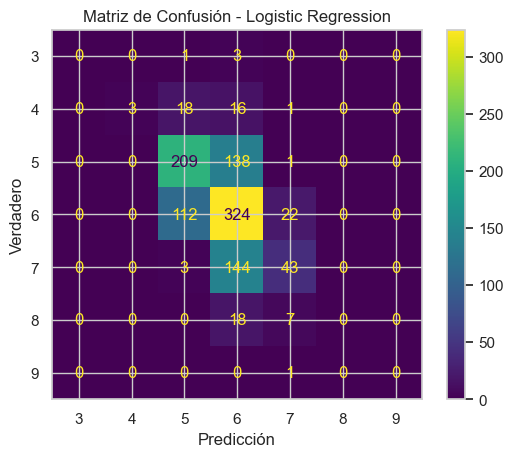


Entrenando modelo: K-Nearest Neighbors (KNN)...

Resultados de K-Nearest Neighbors (KNN):
Reporte de Clasificación - K-Nearest Neighbors (KNN)
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     4.00
4                  0.38    0.16      0.22    38.00
5                  0.54    0.62      0.58   348.00
6                  0.52    0.59      0.55   458.00
7                  0.56    0.36      0.44   190.00
8                  0.14    0.04      0.06    25.00
9                  0.00    0.00      0.00     1.00
accuracy           0.53    0.53      0.53     0.53
macro avg          0.31    0.25      0.26  1064.00
weighted avg       0.52    0.53      0.51  1064.00


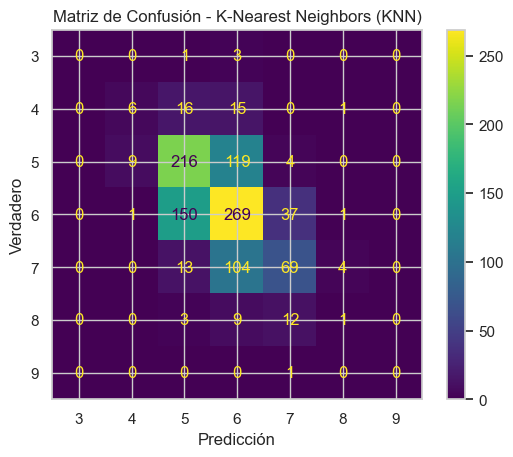

In [570]:

# Separar características (X) y variable objetivo (y)
X = combined_wine.drop(columns=["quality"])  # Excluimos quality como variable objetivo
y = combined_wine["quality"]

# Aplicar One-Hot Encoding a la columna 'type'. Esto hace que para vino blanco type=1, y para vino tinto type=0
X = pd.get_dummies(X, columns=["type"], drop_first=True)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para entrenar y evaluar modelos
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    print(f"\nEntrenando modelo: {model_name}...")
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación
    print(f"\nResultados de {model_name}:")

    # Crear tabla con pandas para el reporte de clasificación
    report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"Reporte de Clasificación - {model_name}")
    print(report_df.round(2))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualización de la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="viridis")
    disp.ax_.set_title(f"Matriz de Confusión - {model_name}")
    disp.ax_.set_xlabel("Predicción")
    disp.ax_.set_ylabel("Verdadero")
    plt.show()

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg, "Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn, "K-Nearest Neighbors (KNN)", X_train_scaled, X_test_scaled, y_train, y_test)



### Datasets de vino tinto y vino blanco por separado


--- Evaluación para Vino Tinto ---


Entrenando modelo: Logistic Regression para Vino Tinto...

Resultados de Logistic Regression para Vino Tinto:
Reporte de Clasificación - Logistic Regression - Vino Tinto
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     4.00
4                  0.00    0.00      0.00    11.00
5                  0.68    0.76      0.72   120.00
6                  0.55    0.60      0.58   103.00
7                  0.48    0.39      0.43    31.00
8                  0.00    0.00      0.00     3.00
accuracy           0.61    0.61      0.61     0.61
macro avg          0.29    0.29      0.29   272.00
weighted avg       0.57    0.61      0.58   272.00


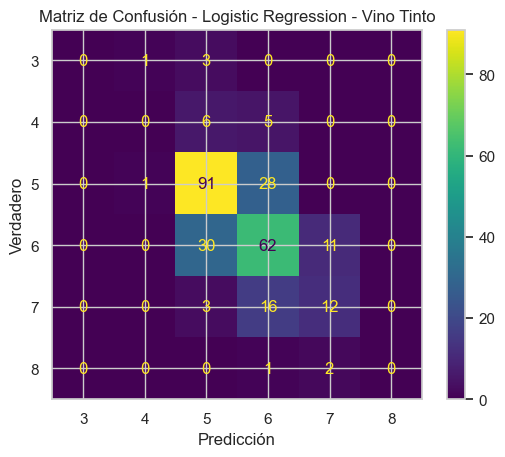


Entrenando modelo: K-Nearest Neighbors (KNN) para Vino Tinto...

Resultados de K-Nearest Neighbors (KNN) para Vino Tinto:
Reporte de Clasificación - K-Nearest Neighbors (KNN) - Vino Tinto
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     4.00
4                  0.00    0.00      0.00    11.00
5                  0.59    0.68      0.63   120.00
6                  0.52    0.50      0.51   103.00
7                  0.48    0.45      0.47    31.00
8                  0.00    0.00      0.00     3.00
accuracy           0.54    0.54      0.54     0.54
macro avg          0.27    0.27      0.27   272.00
weighted avg       0.51    0.54      0.53   272.00


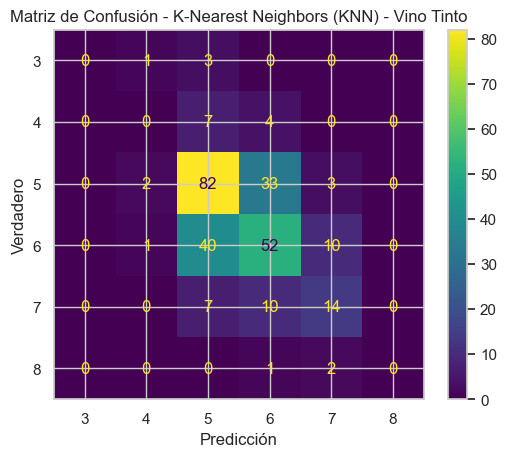


--- Evaluación para Vino Blanco ---


Entrenando modelo: Logistic Regression para Vino Blanco...

Resultados de Logistic Regression para Vino Blanco:
Reporte de Clasificación - Logistic Regression - Vino Blanco
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     5.00
4                  0.29    0.07      0.11    30.00
5                  0.55    0.55      0.55   234.00
6                  0.51    0.70      0.59   349.00
7                  0.53    0.26      0.35   145.00
8                  0.00    0.00      0.00    30.00
9                  0.00    0.00      0.00     0.00
accuracy           0.52    0.52      0.52     0.52
macro avg          0.27    0.23      0.23   793.00
weighted avg       0.49    0.52      0.49   793.00


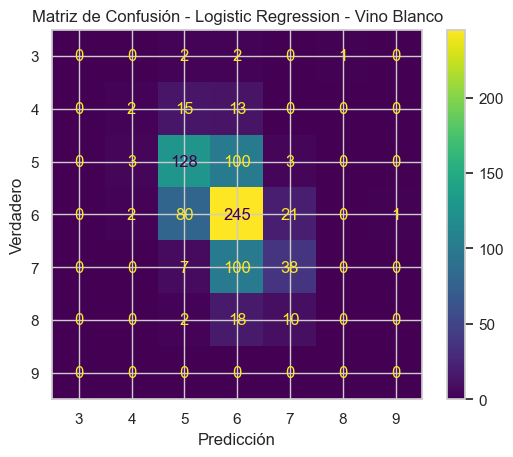


Entrenando modelo: K-Nearest Neighbors (KNN) para Vino Blanco...

Resultados de K-Nearest Neighbors (KNN) para Vino Blanco:
Reporte de Clasificación - K-Nearest Neighbors (KNN) - Vino Blanco
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     5.00
4                  0.19    0.10      0.13    30.00
5                  0.48    0.61      0.54   234.00
6                  0.53    0.57      0.55   349.00
7                  0.46    0.31      0.37   145.00
8                  0.00    0.00      0.00    30.00
accuracy           0.49    0.49      0.49     0.49
macro avg          0.28    0.27      0.27   793.00
weighted avg       0.47    0.49      0.47   793.00


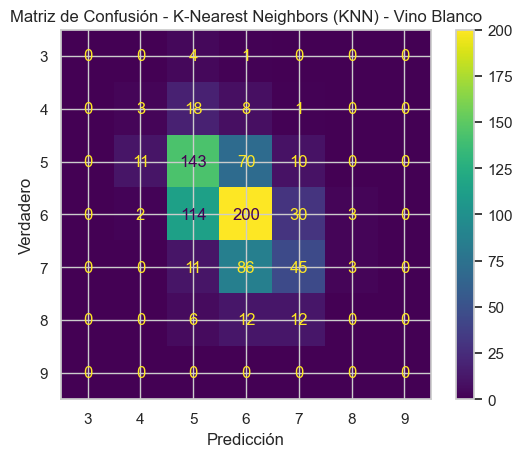

In [571]:
# Función para entrenar y evaluar modelos
def train_and_evaluate_model_separate(model, model_name, X_train, X_test, y_train, y_test, wine_type):
    print(f"\nEntrenando modelo: {model_name} para {wine_type}...")
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación
    print(f"\nResultados de {model_name} para {wine_type}:")

    # Crear tabla con pandas para el reporte de clasificación
    report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"Reporte de Clasificación - {model_name} - {wine_type}")
    print(report_df.round(2))

    # Matriz de confusión
    all_labels = sorted(y_train.unique())  # Etiquetas completas basadas en y_train
    cm = confusion_matrix(y_test, y_pred, labels=all_labels)

    # Visualización de la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
    disp.plot(cmap="viridis")
    disp.ax_.set_title(f"Matriz de Confusión - {model_name} - {wine_type}")
    disp.ax_.set_xlabel("Predicción")
    disp.ax_.set_ylabel("Verdadero")
    plt.show()


# Separar los datasets por tipo de vino
red_wine = combined_wine[combined_wine["type"] == "red"].drop(columns=["type"])
white_wine = combined_wine[combined_wine["type"] == "white"].drop(columns=["type"])

# Dividir cada dataset en características y objetivo
X_red = red_wine.drop(columns=["quality"])
y_red = red_wine["quality"]

X_white = white_wine.drop(columns=["quality"])
y_white = white_wine["quality"]

# Procesar los datos para cada tipo de vino
for wine_type, X, y in [("Vino Tinto", X_red, y_red), ("Vino Blanco", X_white, y_white)]:
    print(f"\n--- Evaluación para {wine_type} ---\n")

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar modelos
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    train_and_evaluate_model_separate(log_reg, "Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test, wine_type)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=5)
    train_and_evaluate_model_separate(knn, "K-Nearest Neighbors (KNN)", X_train_scaled, X_test_scaled, y_train, y_test, wine_type)


### Conclusión

##### Para el dataset combinado, utilizando Logistic Regression y KNN se han obtenido accuracies de 54% y 53% respectivamente. Lo cual apunta a una ligera ventaja al utilizarse Logistic Regression por sobre KNN para este dataset específicamente.

##### Para el dataset de vino tinto, con logistic regression se obtuvo un accuracy de 61% y utilizando KNN un accuracy de 54%, por lo cual logistic regression predice mejor la calidad del vino tinto en las condiciones estudiadas.

##### Para el dataset de vino blanco, con logistic regression se obtuvo un accuracy de 52% y utilizando KNN un accuracy de 49%, por lo cual logistic regression predice mejor la calidad del vino blanco en las condiciones estudiadas.

##### Finalmente, Logistic Regression parece ser la mejor opción en términos generales para predecir la calidad del vino, ya que muestra un desempeño más alto y consistente en todos los casos.